In [1]:
# %%capture

# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
# from doc2img.dataloader import get_raw_dataset
# from doc2img.generating_images import generate_image
# from doc2img.summarization import get_summary
# from doc2img.clip_inference import get_pretrained_clip_scores
import yaml
import matplotlib.pyplot as plt
import cv2

In [2]:
config_file = 'config.yaml'
with open(config_file) as cf_file:
    config = yaml.safe_load(cf_file.read())

In [ ]:
DATASET_TYPE = "stories" # 'poems', 'nyt', 'stories
dataset_path_mini = config['datasets'][DATASET_TYPE + '_mini']
dataset_path_full = config['datasets'][DATASET_TYPE + '_full']
df_mini = get_raw_dataset(DATASET_TYPE, dataset_path_mini, max_examples=None)
df_full = get_raw_dataset(DATASET_TYPE, dataset_path_full, max_examples=None)

In [ ]:
print("Summarization method : ", config['summary_method'])

In [ ]:
#generating summaries
df = get_summary(df_full, df_mini, config)

In [ ]:
#printing summaries
df.head()

In [ ]:
from doc2img.generating_images import generate_image

In [ ]:
# #generating and saving images
df = generate_image(df[:2], config['prompts'])

In [ ]:
#Computing scores using CLIP (Only first 75 tokens of poems are used)
from doc2img.clip_inference import get_pretrained_clip_scores
get_pretrained_clip_scores(df)

In [ ]:
save_folder = config['image_generation']['save_folder']
# reading images
final_index = dataset + "_" + str(index) + "_prompt_0"
save_path_0 = os.path.join(save_folder,str(final_index) +'.jpg')
Image0 = cv2.imread(save_path_0)

In [ ]:
def visualize_images(dataset, index):
    # create figure
    fig = plt.figure(figsize=(10, 7))
    
    # Assuming only 4 prompts
    rows = 2
    columns = 2

    save_folder = config['image_generation']['save_folder']
    
    # reading images
    final_index = dataset + "_" + str(index) + "_prompt_0"
    save_path_0 = os.path.join(save_folder,str(final_index) +'.jpg')
    Image0 = cv2.imread(save_path_0)

    final_index = dataset + "_" + str(index) + "_prompt_1"
    save_path_1 = os.path.join(save_folder,str(final_index) +'.jpg')
    Image1 = cv2.imread(save_path_1)

    final_index = dataset + "_" + str(index) + "_prompt_2"
    save_path_2 = os.path.join(save_folder,str(final_index) +'.jpg')
    Image2 = cv2.imread(save_path_2)

    final_index = dataset + "_" + str(index) + "_prompt_3"
    save_path_3 = os.path.join(save_folder,str(final_index) +'.jpg')
    Image3 = cv2.imread(save_path_3)

    
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    
    # showing image
    plt.imshow(Image0)
    plt.axis('off')
    plt.title(config['prompts'][0])
    
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    
    # showing image
    plt.imshow(Image1)
    plt.axis('off')
    plt.title(config['prompts'][1])
    
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    
    # showing image
    plt.imshow(Image2)
    plt.axis('off')
    plt.title(config['prompts'][2])
    
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    
    # showing image
    plt.imshow(Image3)
    plt.axis('off')
    plt.title(config['prompts'][3])

In [ ]:
visualize_images("poems", 0)

### Sample Analysis

In [8]:
from doc2img.analysis import quant_analysis
config['prompts']

['',
 'A high resolution photo of ',
 'An image illustrating ',
 'Create an image inspired by ',
 'Generate an artistic interpretation of the text ',
 'Imagine an illustration that captures the central theme of the text ',
 'A realistic image of ',
 'Create an abstract artwork captures the essence of the following: ']

Average Max CLIP Score: 29.305335744222006


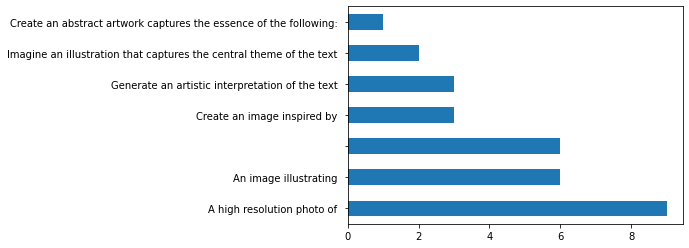

In [9]:
df = pd.read_csv("experiment_pegasus_nyt/df.csv")
df = quant_analysis(df, config['prompts'])

Average Max CLIP Score: 28.950747299194337


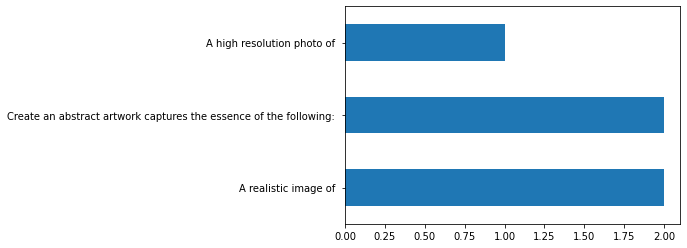

In [10]:
df = pd.read_csv("experiment_pegasus_stories/df.csv")
df = quant_analysis(df, config['prompts'])

Average Max CLIP Score: 25.30655199686686


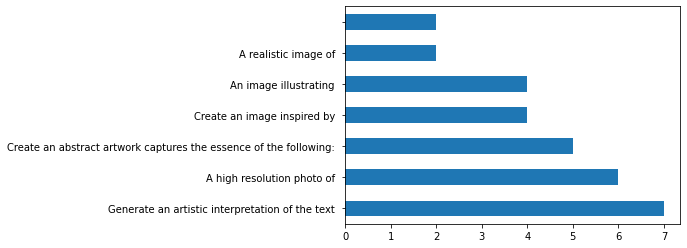

In [11]:
df = pd.read_csv("experiment_pegasus_poems/df.csv")
df = quant_analysis(df, config['prompts'])